## Histogram

In [32]:
# Standard
import numpy as np
import pandas as pd 
from numpy.random import randn
from pandas import Series,DataFrame
# Stats
from scipy import stats
# Ploting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
dataset1 = randn(100)

(array([  2.,   5.,   8.,  15.,  19.,  17.,  22.,   8.,   3.,   1.]),
 array([-2.78054697, -2.21718552, -1.65382407, -1.09046262, -0.52710117,
         0.03626029,  0.59962174,  1.16298319,  1.72634464,  2.28970609,
         2.85306754]),
 <a list of 10 Patch objects>)

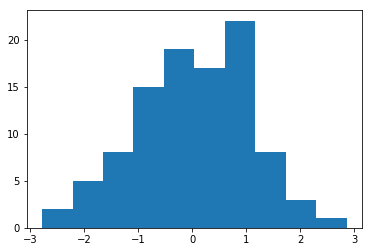

In [21]:
plt.hist(dataset1)

(array([  1.,   2.,   8.,  11.,  10.,   9.,  18.,  10.,   7.,   4.]),
 array([-2.28817522, -1.86813759, -1.44809996, -1.02806234, -0.60802471,
        -0.18798708,  0.23205055,  0.65208818,  1.07212581,  1.49216343,
         1.91220106]),
 <a list of 10 Patch objects>)

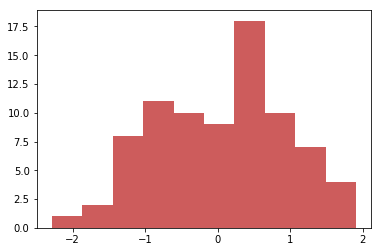

In [14]:
dataset2 = randn(80)
plt.hist(dataset2,color = 'indianred')

(array([ 0.05951848,  0.        ,  0.        ,  0.11903695,  0.11903695,
         0.35711086,  0.29759239,  0.35711086,  0.41662934,  0.17855543,
         0.11903695,  0.41662934,  0.65470325,  0.41662934,  0.23807391,
         0.35711086,  0.23807391,  0.17855543,  0.11903695,  0.11903695]),
 array([-2.28817522, -2.07815641, -1.86813759, -1.65811878, -1.44809996,
        -1.23808115, -1.02806234, -0.81804352, -0.60802471, -0.39800589,
        -0.18798708,  0.02203174,  0.23205055,  0.44206936,  0.65208818,
         0.86210699,  1.07212581,  1.28214462,  1.49216343,  1.70218225,
         1.91220106]),
 <a list of 20 Patch objects>)

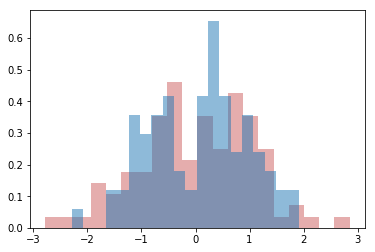

In [23]:
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins = 20)
plt.hist(dataset2,normed=True,alpha=0.5,bins =20)

In [24]:
data1 = randn(1000)
data2 = randn(1000)

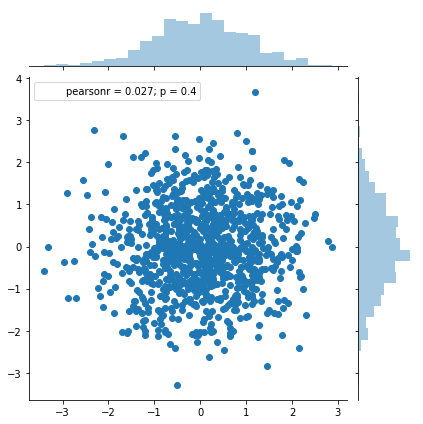

In [25]:
sns.jointplot(data1,data2)

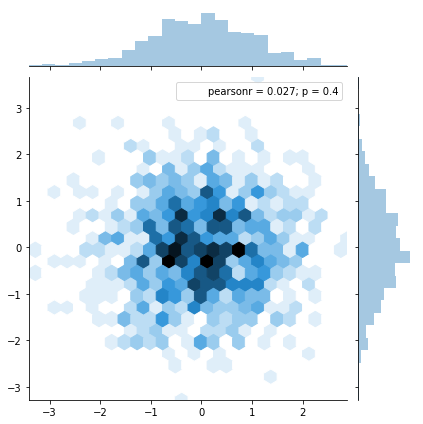

In [31]:
sns.jointplot(data1,data2,kind = 'hex')

## Kernel Density Estimation Plots - KDEPlots

In [33]:
# Standard
import numpy as np
import pandas as pd 
from numpy.random import randn
from pandas import Series,DataFrame
# Stats
from scipy import stats
# Ploting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
dataset = randn(25)

(0, 1)

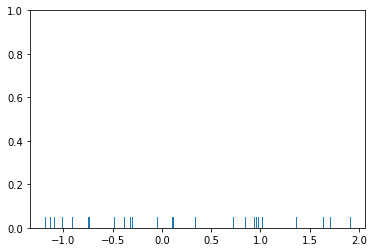

In [46]:
sns.rugplot(dataset)
plt.ylim(0,1)

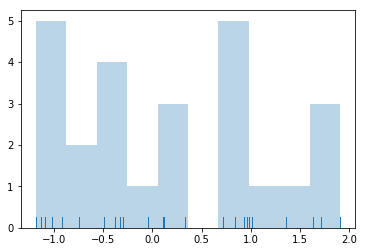

In [56]:
plt.hist(dataset,alpha=0.3)   # alpha 透明度
sns.rugplot(dataset)

(0, 1)

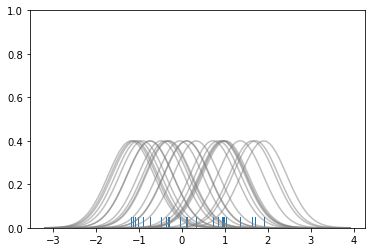

In [57]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []
for data_point in dataset:
    #Create a kernel for each point and append to the kernek list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

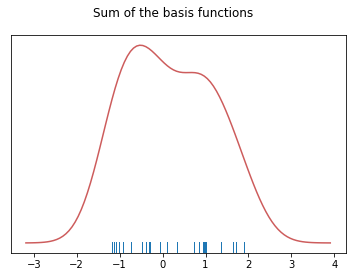

In [59]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color = 'indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the basis functions')

([], <a list of 0 Text yticklabel objects>)

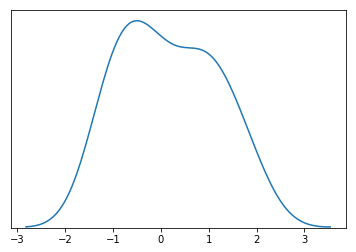

In [61]:
sns.kdeplot(dataset)   

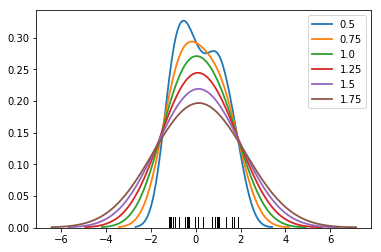

In [62]:
sns.rugplot(dataset,color = 'black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)
    

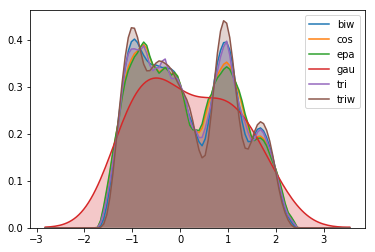

In [64]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label = kern,shade=True)  # shade 阴影

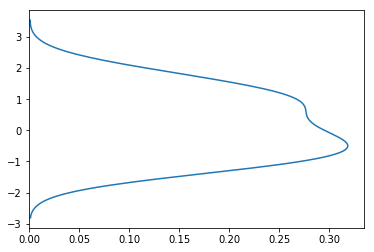

In [65]:
sns.kdeplot(dataset,vertical=True)

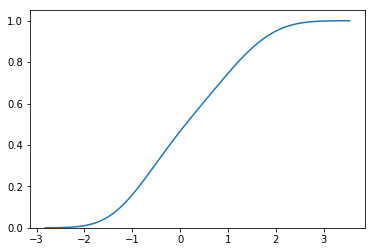

In [66]:
sns.kdeplot(dataset,cumulative=True)

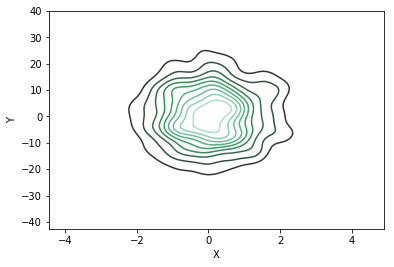

In [70]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

df = DataFrame(dataset2,columns = ['X','Y'])
sns.kdeplot(df.X,df.Y)

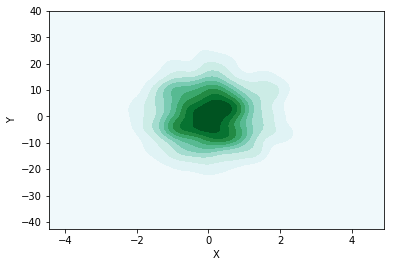

In [71]:
sns.kdeplot(df.X,df.Y,shade=True)

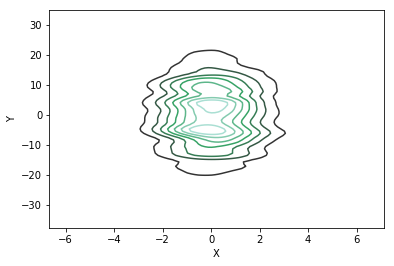

In [76]:
sns.kdeplot(df.X,df.Y,bw = 1)

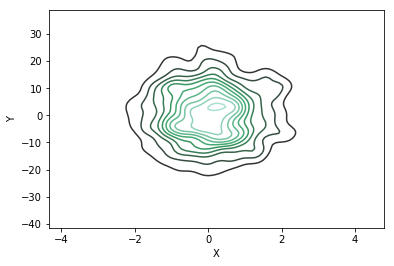

In [77]:
sns.kdeplot(df.X,df.Y,bw = 'silverman')

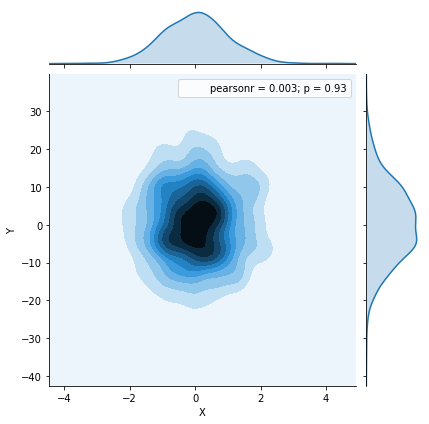

In [78]:
sns.jointplot('X','Y',df,kind = 'kde')

In [80]:
df  = DataFrame(np.arange(16).reshape(4,4),index = [1,2,3,4],columns = ['A','B','C','D'])
df

,A,B,C,D
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15


([array([ 1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
  array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.]),
  array([ 0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.])],
 array([  0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,  11.2,
         12.6,  14. ]),
 <a list of 4 Lists of Patches objects>)

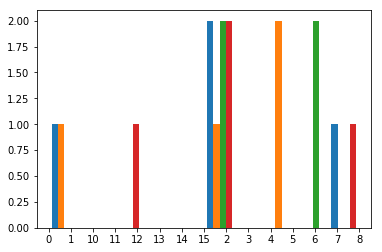

In [94]:
plt.hist(df,alpha=1)   # alpha 透明度
